<a href="https://colab.research.google.com/github/alex-jk/SWB-GVCEH/blob/main/models/relevance_model/Relevance_Model_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import os

In [137]:
# Base URL for raw content in the GitHub repository
base_url = 'https://raw.githubusercontent.com/alex-jk/SWB-GVCEH/main/models/relevance_model/'

# Correctly encode the file names by replacing spaces with '%20'
csv_file1 = 'GVCEH%20Milestone%202%20Labelling%201%20-%20RawData.csv'
csv_file2 = 'GVCEH%20Milestone%202%20Labelling%202%20-%20RawData.csv'

# Read the CSV files from GitHub
df1 = pd.read_csv(base_url + csv_file1, usecols=['text', 'Relevant to Victoria', 'Relevant to Homelessness'])
df2 = pd.read_csv(base_url + csv_file2, usecols=['text', 'Relevant to Victoria', 'Relevant to Homelessness'])

# Rename columns for convenience
df1 = df1.rename(columns={"Relevant to Victoria": "vic", "Relevant to Homelessness": "hl"})
df2 = df2.rename(columns={"Relevant to Victoria": "vic", "Relevant to Homelessness": "hl"})

# Display the first few rows of the DataFrame
print(df1.columns)
print(df1.head())

Index(['vic', 'hl', 'text'], dtype='object')
   vic  hl                                               text
0  Yes  No  @AnnaGreenwoodL1 @saanich Dawson Heights Housi...
1   No  No  It's Election Day and the polls are now open u...
2   No  No  Sidney Bulwer Michaelia Roger #彩票 Bblythe Camp...
3   No  No  Me telling my parents I’m gonna spit on this o...
4   No  No  WRD Director Joy Langford shared water conserv...


In [138]:
from transformers import AutoModel

# Load the model
model = AutoModel.from_pretrained("sheilaflood/gvceh-setfit-rel-model2")

# Check the configuration of the model
config = model.config

# Check the state dictionary (weights) of the model
state_dict = model.state_dict()

In [139]:
# Print the configuration of the model
print(model.config)

# For example, to print the weights of the first transformer layer
print(state_dict['encoder.layer.0.attention.self.query.weight'])

RobertaConfig {
  "_name_or_path": "sheilaflood/gvceh-setfit-rel-model2",
  "architectures": [
    "RobertaModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.35.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

tensor([[ 0.0748, -0.0012, -0.0722,  ...,  0.1540,  0.0737, -0.1073],
        [-0.0733,  0.2006,  0.1053,  ...,  0.0542,  0.0490,  0.1169],
        [ 0.1180,  0.0596, -0.0387,  ..., -0.0220, -0.0336,  0.1252],
        ...,
        [-0.1779,  0.0062, -0.0507,  .

In [140]:
base_url = 'https://raw.githubusercontent.com/alex-jk/SWB-GVCEH/main/data/processed/twitter/github_actions/'
csv_file1 = 'GVCEH-tweets-combined_2022-04-03.csv'
df1 = pd.read_csv(base_url + csv_file1)

print(df1.columns)
print(df1.shape)
print(df1.head(15))

Index(['Unnamed: 0', 'text', 'scrape_time', 'tweet_id', 'created_at',
       'reply_count', 'quote_count', 'like_count', 'retweet_count',
       'geo_full_name', 'geo_id', 'username', 'num_followers',
       'search_keywords', 'search_neighbourhood', 'sentiment', 'score'],
      dtype='object')
(8885, 17)
    Unnamed: 0                                               text  \
0           23  @RogersCrispin @JinnealRobenko @Adam_Stirling ...   
1           24  @citizens_vicbc As opposed to only having mult...   
2           31  It's great to see Saanich Council taking actio...   
3           32  @spaze_cadet @CStrable @chrislhayes Because of...   
4           35  Ex-@BCLegislature Speaker Darryl Plecas reacts...   
5           37  @KristaLoughton @CityOfVictoria Do you think t...   
6           38  @GoVern2018 Hi Vernon. I assume you seen Victo...   
7           40  Saanich homeowners won't need council approval...   
8           45  RT @VicBuilders: @tim3048 @TristinHopper Same ...   
9  

In [141]:
print(df1.text[0])

@RogersCrispin @JinnealRobenko @Adam_Stirling @timescolonist Sure and not cancelling affordable housing projects in the 80’s, not inducing urban sprawl in Langford, and prioritizing smart urban density instead of doing Gordon Head all could have been better… but we have what we have and have to find a way forward given the circumstance.


In [142]:
!pip install setfit

In [143]:
from setfit import SetFitModel

# Load the pretrained SetFit model
model = SetFitModel.from_pretrained("sheilaflood/gvceh-setfit-rel-model2")

# Example text data
texts = ["Example text relevant to homelessness in Victoria.", "Irrelevant text about other topics."]

# Model makes predictions
predictions = model(texts)
print(predictions)
# The predictions would be an array of binary labels, such as [1, 0]

tensor([1, 0])


In [144]:
file_path = '/content/drive/My Drive/SWB-GVCEH/reddit_data_search_terms.csv'  # Update with the path to your CSV file in Google Drive
reddit_data_search_df = pd.read_csv(file_path)
print(reddit_data_search_df.shape)
print(reddit_data_search_df.columns)
print(reddit_data_search_df.head(20))

(152161, 6)
Index(['Subreddit', 'Title', 'Text', 'User ID', 'Comment', 'Search Term'], dtype='object')
   Subreddit                                              Title  \
0      Sooke                                   Camping in Sooke   
1      Sooke                                   Camping in Sooke   
2      Sooke                                   Camping in Sooke   
3      Sooke                                   Camping in Sooke   
4      Sooke  Sooke boy denied $19,000 per month drug for th...   
5      Sooke        Are power outages in Sooke a regular thing?   
6      Sooke        Are power outages in Sooke a regular thing?   
7      Sooke        Are power outages in Sooke a regular thing?   
8      Sooke        Are power outages in Sooke a regular thing?   
9      Sooke        Are power outages in Sooke a regular thing?   
10     Sooke  Help: What’s the best option for housing right...   
11     Sooke  Help: What’s the best option for housing right...   
12     Sooke  Help: What’s

In [145]:
# Combine 'Title' and 'Text'
reddit_data_search_df['TitleText'] = reddit_data_search_df['Title'] + ' ' + reddit_data_search_df['Text']

ind = 10
select_text = reddit_data_search_df['TitleText'][ind]
print(select_text)
print(model(select_text))

print(reddit_data_search_df['Comment'][ind])

Help: What’s the best option for housing right now for someone about to move from out of province to Sooke for a job? Looking for at least a two bedroom, preferably a house than a condo. Is it better to rent or buy? Or live somewhere else and commute?
tensor(1)
About the same options for those of us already living here. Nothing.


In [146]:
unique_title_text_df = (
    reddit_data_search_df.groupby(['Subreddit', 'User ID', 'TitleText'])['Search Term']
    .agg(lambda x: ', '.join(x.unique()))
    .reset_index()
)
print(unique_title_text_df.shape)

num_nan_titletext = unique_title_text_df['TitleText'].isna().sum()
print(f"Number of rows with NA TitleText: {num_nan_titletext}")

print(unique_title_text_df.head(10))

(3730, 4)
Number of rows with NA TitleText: 0
    Subreddit       User ID  \
0       Sooke       Pkard82   
1       Sooke  VanillaWrong   
2       Sooke      babetteq   
3       Sooke   redd_planet   
4       Sooke  scoobysmokes   
5  VictoriaBC  --citylights   
6  VictoriaBC   -Dumblejor-   
7  VictoriaBC       -mikew-   
8  VictoriaBC       -mikew-   
9  VictoriaBC        00Noir   

                                           TitleText  \
0  Are power outages in Sooke a regular thing? Gr...   
1  Camping in Sooke Hi, we’re planning on camping...   
2  Cockatoo escaped across from Saseenos. Please ...   
3  Help: What’s the best option for housing right...   
4  Are there sexual predator watchdog groups in S...   
5  Affordable Internet in Downtown Victoria A fri...   
6  Blade Runner 2049 in IMAX on Sept 20th - come ...   
7  Best Kim-chi in Victoria? Hey guys,\n\nI'm loo...   
8  Does anyone in Victoria want some stuff?  (com...   
9  Valentines Day 'at home' dinner options? Hi al...

In [147]:
# Filter the DataFrame to create two separate DataFrames
# One with rows where 'TitleText' is not NaN
df_with_text = unique_title_text_df[unique_title_text_df['TitleText'].notna()].reset_index(drop=True)

# One with rows where 'TitleText' is NaN
df_with_nan = unique_title_text_df[unique_title_text_df['TitleText'].isna()].reset_index(drop=True)

# Display the number of rows in each DataFrame
print(f"With text: {len(df_with_text)}, no text: {len(df_with_nan)}")

With text: 3730, no text: 0


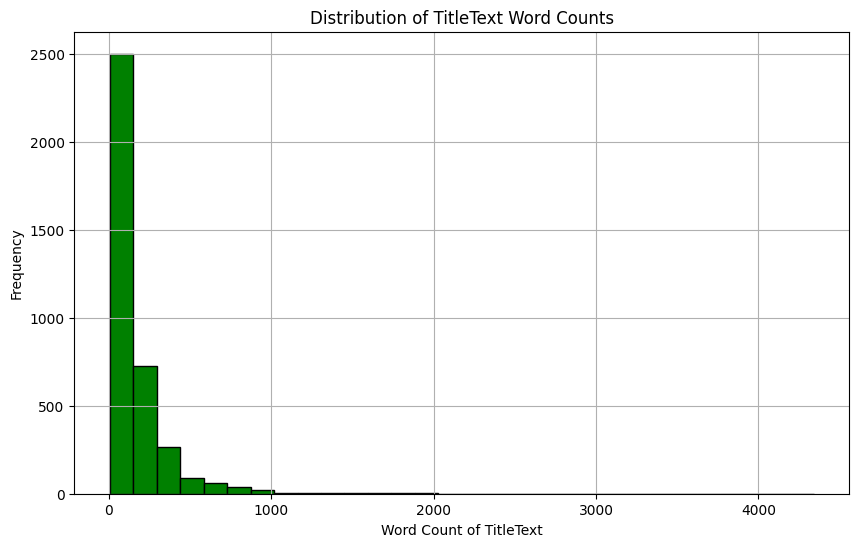

In [148]:
# Calculate the number of words in each TitleText
unique_title_text_df['WordCount'] = unique_title_text_df['TitleText'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(unique_title_text_df['WordCount'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of TitleText Word Counts')
plt.xlabel('Word Count of TitleText')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [149]:
ind = 19
print(df_with_text['Search Term'][ind])
print(model(df_with_text['TitleText'][ind]))
print(df_with_text['TitleText'][ind])

Low income, Low-income, Peer Housing Support, Peer Housing Support Program
tensor(1)
BC already has rent-control laws. Maybe it's time for property-tax-control laws too. (From TC: "Property tax idea from a B.C. senior") *[Article from the Times Colonist]*

**Comment: Property tax idea from a B.C. senior**

I am a low-income senior living on payments from the Canada Pension Plan and Old Age Security programs. Every year at this time, I must pay my biggest bill of all, my property taxes.

I live in a modest, older bungalow which matches my income and lifestyle.

After 33 years, my house assessment has dropped by half, but my lot assessment has leaped from $55,000 to $1.2 million even though the lot has not changed. In other words, almost all of the property tax I struggle to pay is due to speculative inflation.

Luckily I, like many of the current flood of retiring baby boomers, qualify for Property Tax Deferment.

Property tax deferment is available to B.C. homeowners who are 55 years o

#### Run relevance model

In [150]:
!pip install tqdm

In [151]:
from tqdm.notebook import tqdm

# Function to apply the model to each row
def predict_relevance(text):
    # The model might expect a list of texts, adjust accordingly
    prediction = model([text])[0].numpy()
    return prediction

print(predict_relevance('Unfortunately the PTD is just a Band-Aid solution rather than part of any cure to the underlying problems.'))

# Apply the model to the 'TitleText' column with a progress bar
tqdm.pandas(desc="Predicting Relevance")
df_with_text['RelevancePrediction'] = df_with_text['TitleText'].progress_apply(predict_relevance)

# Display the DataFrame with predictions
print(df_with_text.columns)
print(df_with_text[['TitleText', 'RelevancePrediction']].head())

1


Predicting Relevance:   0%|          | 0/3730 [00:00<?, ?it/s]

Index(['Subreddit', 'User ID', 'TitleText', 'Search Term',
       'RelevancePrediction'],
      dtype='object')
                                           TitleText  RelevancePrediction
0  Are power outages in Sooke a regular thing? Gr...                    0
1  Camping in Sooke Hi, we’re planning on camping...                    0
2  Cockatoo escaped across from Saseenos. Please ...                    0
3  Help: What’s the best option for housing right...                    1
4  Are there sexual predator watchdog groups in S...                    0


In [152]:
relevance_counts = df_with_text['RelevancePrediction'].value_counts()

print(relevance_counts)

0    2639
1    1091
Name: RelevancePrediction, dtype: int64


In [154]:
df_with_text.to_csv('df_with_text.csv', index=False)
!apt-get install git

!git config --global user.name "alex-jk"
!git config --global user.email "alex.joukova@gmail.com"
#!git clone https://github.com/alex-jk/SWB-GVCEH.git
%cd SWB-GVCEH


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
Cloning into 'SWB-GVCEH'...
remote: Enumerating objects: 4790, done.
remote: Counting objects: 100% (4790/4790), done.
remote: Compressing objects: 100% (1429/1429), done.
remote: Total 4790 (delta 3343), reused 4679 (delta 3284), pack-reused 0
Receiving objects: 100% (4790/4790), 106.73 MiB | 19.58 MiB/s, done.
Resolving deltas: 100% (3343/3343), done.
Updating files: 100% (140/140), done.
/content/SWB-GVCEH


In [155]:
!mv ../df_with_text.csv ./models/relevance_model/

In [156]:
os.environ['GITHUB_PAT'] = 'xxx'
# Set your git remote URL to include the PAT for authentication
repo_url = 'https://github.com/alex-jk/SWB-GVCEH.git'  # Replace with your repository's URL
pat = os.environ['GITHUB_PAT']
repo_url_with_token = repo_url[:8] + pat + "@" + repo_url[8:]

!git remote set-url origin {repo_url_with_token}

# Navigate to the repository directory, add, commit, and push the new CSV file
%cd /content/SWB-GVCEH
!git add 'models/relevance_model/df_with_text.csv'
!git commit -m "Add df_with_text CSV"
!git push origin main  # Replace 'main' with your branch name if it's different

# Reset the remote URL to the original without the PAT
!git remote set-url origin {repo_url}
print("CSV file pushed to GitHub.")

/content/SWB-GVCEH
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
CSV file pushed to GitHub.


#### Load reddit posts with relevance indicator data

In [157]:
# URL of the raw CSV file in the GitHub repository
csv_url = 'https://raw.githubusercontent.com/alex-jk/SWB-GVCEH/main/models/relevance_model/df_with_text.csv'

# Read the CSV file into a DataFrame
df_with_text = pd.read_csv(csv_url)
# Display the first few rows of the DataFrame
print(df_with_text.head())

df_with_text_relevant = df_with_text[df_with_text['RelevancePrediction']==1].copy().reset_index(drop=True)

  Subreddit       User ID                                          TitleText  \
0     Sooke       Pkard82  Are power outages in Sooke a regular thing? Gr...   
1     Sooke  VanillaWrong  Camping in Sooke Hi, we’re planning on camping...   
2     Sooke      babetteq  Cockatoo escaped across from Saseenos. Please ...   
3     Sooke   redd_planet  Help: What’s the best option for housing right...   
4     Sooke  scoobysmokes  Are there sexual predator watchdog groups in S...   

                               Search Term  RelevancePrediction  
0                                     Home                    0  
1                      Camp, Camping, Tent                    0  
2  Housing, Sooke Transition House Society                    0  
3  Housing, Sooke Transition House Society                    1  
4           Victoria Sexual Assault Centre                    0  


#### Check actual text of the posts that were predicted to be relevant

In [158]:
ind = 11 # 0 3 4 5; 6? 7? 10?
print(df_with_text_relevant['Search Term'][ind])
print(df_with_text_relevant['TitleText'][ind])

Greater Victoria Coalition to End Homelessness 
Best place to sell used high end clothing in Victoria?? Is Varage Sale still a thing? Is Depop worth it to pay for? Or is FB Marketplace the general consensus these days? 

I’m literally cleaning out my closet so this won’t necessarily be an ongoing thing but would be nice to get rid of a bunch of nice clothes relatively fast and pocket some cash. Thanks in advanced!


In [96]:
print(reddit_data_search_df[reddit_data_search_df['TitleText']==df_with_text_relevant['TitleText'][ind]].shape)

# Retrieve the TitleText for the given index 'ind' from df_with_text_relevant
title_text_to_match = df_with_text_relevant['TitleText'][ind]

# Filter reddit_data_search_df for rows with matching TitleText
matching_comments = reddit_data_search_df[reddit_data_search_df['TitleText'] == title_text_to_match]['Comment']

# Print each comment on a new line
for comment in matching_comments:
    print(comment)
    print("\n")  # Adding a new line for better readability between comments

(6, 7)
Cycling the Galloping Goose to Sooke is a good start.

Here's a few of my recommendations.

From Water:

* Go fishing, sailing, whale watching.
* Rent a kayak from the Selkirk waterfront and check out the inner harbour and the Gorge.
* Take a tour on one of those mini tourist boats that you see in the inner harbour. They aren't that expensive.

Nature:

* Check out the view from atop Mt Doug (easy hike) or Mt. Finlayson (harder)
* Tons of great hiking around. My favourite easy hike is the Mackenzie Blight trail at Gowlland Todd provincial park.
* Say hello to the seals at the Oak Bay Marina. Hard not to give them a little food at the same time.

Get out of Victoria:

* Botanical beach near Pt. Renfrew. Try to check the tide tables and arrange to get there at low tide. Can stop off at the Sooke Potholes along the way.
* Trip up-island. Coombs is a touristy place to visit, and Catherdral Grove is an awesome and accessible old growth forest with some massive trees. Have a picnic at

#### Load twitter data that was already filtered for relevancy

In [97]:
# List of file names
file_names = [
    'GVCEH-tweets-combined_2023-02-08.csv',
    'GVCEH-tweets-combined_2023-01-30.csv',
    'GVCEH-tweets-combined_2023-01-21.csv',
    'GVCEH-tweets-combined_2023-01-12.csv'
]

# Base URL for raw files in the GitHub repository
base_url = 'https://raw.githubusercontent.com/alex-jk/SWB-GVCEH/main/data/processed/twitter/github_actions/'

# Initialize a list to collect the DataFrames
dfs = []

for file_name in file_names:
    # Construct the full URL for the current file
    file_url = base_url + file_name
    # Read the CSV file
    current_df = pd.read_csv(file_url)
    # Append the DataFrame to the list
    dfs.append(current_df)

# Concatenate all DataFrames in the list
tweets_combined_df = pd.concat(dfs, ignore_index=True)
# Remove duplicates
tweets_combined_df = tweets_combined_df.drop_duplicates().reset_index(drop=True)

# Displaying the first few rows of the DataFrame
print(tweets_combined_df.shape)
print(tweets_combined_df.columns)
print(tweets_combined_df.head())

(5435, 17)
Index(['Unnamed: 0', 'text', 'scrape_time', 'tweet_id', 'created_at',
       'reply_count', 'quote_count', 'like_count', 'retweet_count',
       'geo_full_name', 'geo_id', 'username', 'num_followers',
       'search_keywords', 'search_neighbourhood', 'sentiment', 'score'],
      dtype='object')
   Unnamed: 0                                               text  \
0           0  RT pressjournal: Colonsay islanders and people...   
1           1  Colonsay islanders and people who have left th...   
2           7  @ArianeBurgessHI Serviced plots for 25k are ex...   
3           9  RT @VicBuilders: "25-unit townhome development...   
4          27  @OurNewHomecoach @laughatthemoon2 There is so ...   

                  scrape_time             tweet_id                 created_at  \
0  2023-02-07 03:20:43.040309  1622564995115503616  2023-02-06 11:56:55+00:00   
1  2023-02-07 03:20:43.040317  1622550741599625221  2023-02-06 11:00:16+00:00   
2  2023-02-07 03:20:51.207543  1622549961

In [103]:
ind = 4
print(tweets_combined_df['search_neighbourhood'][ind])
print(tweets_combined_df['search_keywords'][ind])
print(tweets_combined_df['text'][ind])

900-block pandora avenue OR esquimalt OR highlands OR metchosin OR pacheedaht OR saanich OR sooke OR vic west
(900-block pandora avenue OR esquimalt OR highlands OR metchosin OR pacheedaht OR saanich OR sooke OR vic west) (greater victoria coalition to end homelessness OR the homeless idea podcast OR esquimalt nation office OR substance uvic OR aryze developments OR oak bay united church OR victoria downtown residents association OR aboriginal coalition to end homelessness OR lived experience OR healthcare OR social housing OR stolen) lang:en -is:retweet
@OurNewHomecoach @laughatthemoon2 There is so much more to this as well I live in the sth highlands and talking to other trades there is a shortage of labour and council are taking up 12 mths on approvals and that includes small jobs even if the gov facilitate social housing it’s not enough


In [104]:
!pip install -U sentence-transformers

In [105]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('all-MiniLM-L6-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [108]:
# If your dataset is large, consider using a sample of your Twitter data
twitter_embeddings = model.encode(tweets_combined_df['text'].tolist(), show_progress_bar=True)

# Encode the Reddit posts
reddit_embeddings = model.encode(df_with_text['TitleText'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/170 [00:00<?, ?it/s]

Batches:   0%|          | 0/117 [00:00<?, ?it/s]

Current k: 1
Current k: 2
Current k: 3
Current k: 4
Current k: 5
Current k: 6
Current k: 7
Current k: 8
Current k: 9
Current k: 10
Current k: 11
Current k: 12
Current k: 13
Current k: 14
Current k: 15
Current k: 16
Current k: 17
Current k: 18
Current k: 19
Current k: 20
Current k: 21
Current k: 22
Current k: 23
Current k: 24
Current k: 25
Current k: 26
Current k: 27
Current k: 28
Current k: 29
Current k: 30
Current k: 31
Current k: 32
Current k: 33
Current k: 34
Current k: 35
Current k: 36
Current k: 37
Current k: 38
Current k: 39


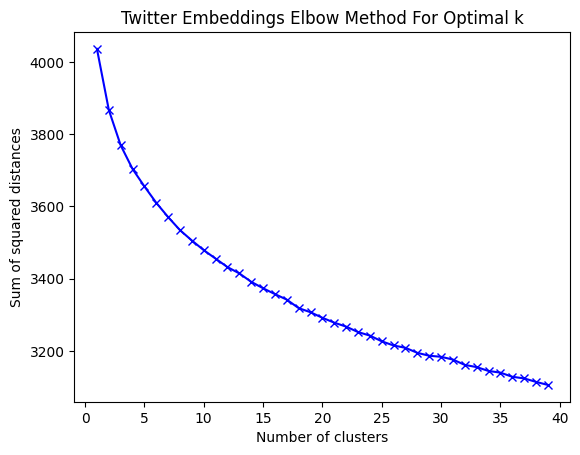

In [112]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate sum of squared distances for different number of clusters
Sum_of_squared_distances = []
K = range(1,40)  # Adjust the range based on your dataset
for k in K:
    print(f"Current k: {k}")
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(twitter_embeddings)
    Sum_of_squared_distances.append(km.inertia_)

# Plot the elbow graph
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Twitter Embeddings Elbow Method For Optimal k')
plt.show()

#### Assign clusters to embeddings

In [117]:
from sklearn.cluster import KMeans

k = 15  # number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(twitter_embeddings)

cluster_centroids = kmeans.cluster_centers_

tweets_combined_df['cluster'] = kmeans.labels_

In [124]:
print(tweets_combined_df['cluster'] .unique())

ind = 1
cluster_tweets = tweets_combined_df[tweets_combined_df['cluster'] == ind].copy().reset_index(drop=True)
for i in range(0, 10):
  print("\nPrinting tweet")
  print(cluster_tweets['text'][i])

[ 4  5 14 13 12 10  6  9  1 11  0  2  8  3  7]

Printing tweet
Inside Victoria’s New Temporary Hotels for the Homeless - Capital Daily:  https://t.co/oKUmMqa6Fb

Printing tweet
Where are Victoria's homeless coming from? - Capital Daily:  https://t.co/hMKu2DaBPX

Printing tweet
Yes! 

Blanche is right on! 

Victoria Park is chewed up for a new splash pad. 

While the homeless are kicked out with nowhere to go. 

Screwed-up priorities. https://t.co/aSM7KAzlOj

Printing tweet
Knowing rough sleepers by name key to solving street homelessness.
https://t.co/0HSKLwIgEd https://t.co/EIflNILM5M

Printing tweet
The New York Times highlighted three Canadian court decisions that have ruled that the shelter system does not meet the needs of homeless people, including the case of Kitchener's 100 Victoria St. encampment. 

https://t.co/XKHgj0F8Hy

Printing tweet
I remember a few short years ago, local #yyj radio stations reported this #MMIWG march as “homeless people blocking Pandora by Our Place.”So

In [169]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a variable `reddit_embeddings` which is a list of embeddings for Reddit posts
reddit_similarity_scores = cosine_similarity(reddit_embeddings, cluster_centroids)
print(reddit_similarity_scores[0])

# threshold
threshold = 0.5

# Create a boolean array where each item will be True if the post is relevant and False otherwise
is_relevant = np.max(reddit_similarity_scores, axis=1) > threshold

# Assign the boolean array to your reddit DataFrame
df_with_text['is_relevant_kmeans'] = is_relevant

print(df_with_text.columns)

# print counts
print("\nis_relevant_kmeans counts")
print(df_with_text['is_relevant_kmeans'].value_counts())

freq_matrix = pd.crosstab(df_with_text['is_relevant_kmeans'], df_with_text['RelevancePrediction'])
print("\nis_relevant_kmeans vs Model RelevancePrediction frequency matrix")
print(freq_matrix)

[0.15314493 0.12702018 0.15998551 0.07015171 0.15632503 0.1551142
 0.12138703 0.16603962 0.08071626 0.11572608 0.14504847 0.09774242
 0.15969478 0.15791374 0.13755713]
Index(['Subreddit', 'User ID', 'TitleText', 'Search Term',
       'RelevancePrediction', 'is_relevant_kmeans'],
      dtype='object')

is_relevant_kmeans counts
False    2706
True     1024
Name: is_relevant_kmeans, dtype: int64

is_relevant_kmeans vs Model RelevancePrediction frequency matrix
RelevancePrediction     0    1
is_relevant_kmeans            
False                2267  439
True                  372  652


In [177]:
relevant_reddit_posts_kmeans = df_with_text[df_with_text['is_relevant_kmeans']].copy().reset_index(drop=True)

ind = 11
print(relevant_reddit_posts_kmeans['TitleText'][ind])

Greater Victoria housing needs by municipality As homes are selling for hundreds of thousands over asking and demand is at an all-time high, the local housing advocates, Homes for Living YYJ, have created these graphics showing the housing needs per municipality vs what is being built. These graphics show the housing units municipalities need to build annually in order to eliminate the housing deficit in the next 10 years. 

It appears Langford is building much more housing than needed, but of course, that’s not really the case as they’re absorbing all the growth the others are pushing out. This has resulted in forests being wiped clean, sprawl, and packed highways. 

It is very eye-opening seeing the numbers and how far off the core municipalities are. Every year that goes by, the annual need increases. 

[https://www.homesforliving.ca/](https://www.homesforliving.ca/)

[https://twitter.com/HomesForLiving\_/status/1470455820328439813](https://twitter.com/HomesForLiving_/status/1470455

#### Apply relevancy model to each sentence

In [178]:
!pip install spacy
!python -m spacy download en_core_web_sm

2023-11-24 23:01:56.148099: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 23:01:56.148182: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 23:01:56.148264: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-24 23:01:59.886938: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [180]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to split text into sentences using spaCy
def spacy_sentence_split(text):
    doc = nlp(text)
    return [sent.text.strip() for sent in doc.sents]

# function to calculate the percentage of relevant sentences
def calculate_relevant_percentage(text):
    sentences = spacy_sentence_split(text)
    if not sentences:
        return 0  # To handle empty texts

    relevant_count = sum(model_predict(sentence) for sentence in sentences)
    return (relevant_count / len(sentences)) * 100